<a href="https://colab.research.google.com/github/iamatishay/NLP/blob/main/SentimentAnalysisOnIMDbReviews2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import metrics
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim import models
from gensim.models import word2vec
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

C:\Users\ATISHAY\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\ATISHAY\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
#dataset from link - https://www.kaggle.com/c/si650winter11/data , Format: 1|0 (tab) sentence , 100086 lines.
path = 'C:\\Users\\ATISHAY\\Desktop\\labeledTrainData.tsv'
data = pd.read_table(path,header=None,skiprows=1,names=['Sentiment','Review'])
X = data.Review
y = data.Sentiment

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 5814_8 to 8478_8
Data columns (total 2 columns):
Sentiment    25000 non-null int64
Review       25000 non-null object
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


In [ ]:
Sentiment_words=[]
for Sentiment in data['Sentiment']:
    if Sentiment ==0:
        Sentiment_words.append('Negative')
    elif Sentiment == 1:
        Sentiment_words.append('Postive')

In [ ]:
word_count=pd.value_counts(data['Sentiment'].values, sort=False)
word_count

0    12500
1    12500
dtype: int64

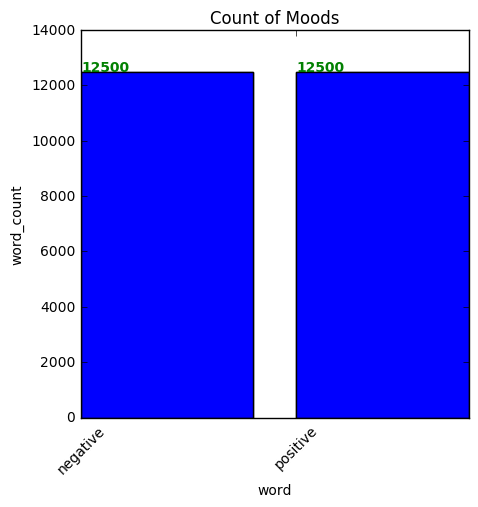

In [ ]:
Index = [1,2]
plt.figure(figsize=(5,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['negative','positive'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)

for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')
plt.show()

In [ ]:
def review_to_words(raw_review):
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [ ]:
positive=data[data['Sentiment']==1]

In [ ]:
words = ' '.join(positive['Review'])
split_word = " ".join([word for word in words.split()])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)

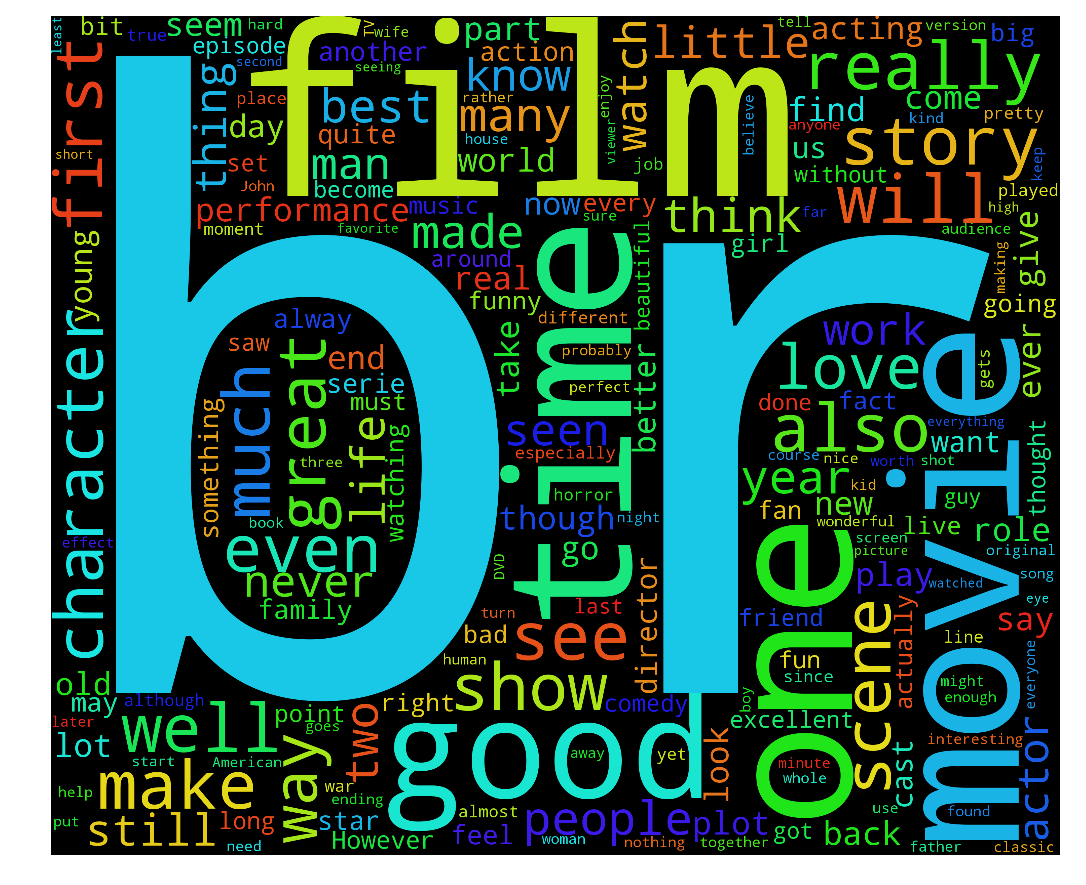

In [ ]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
negative=data[data['Sentiment']==0]

In [ ]:
words1 = ' '.join(negative['Review'])
split_word = " ".join([word for word in words1.split()])

In [ ]:
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)

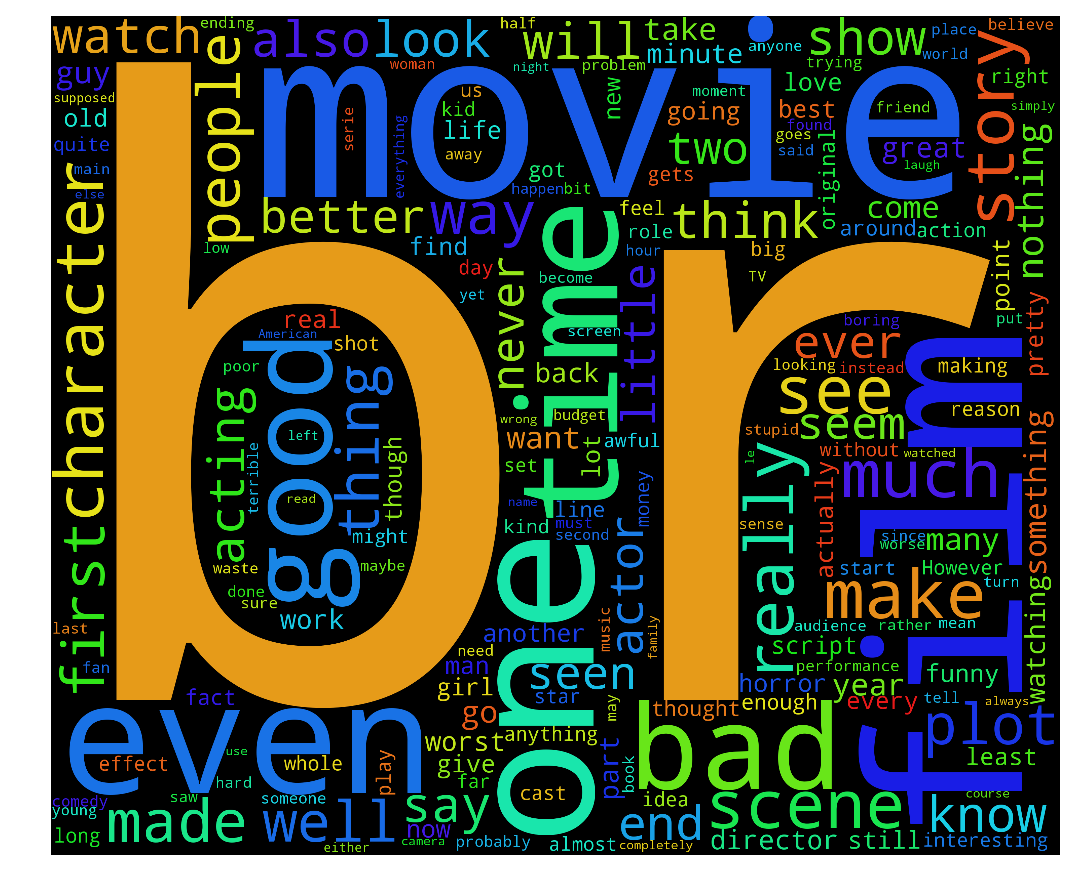

In [ ]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [ ]:
pos=positive['Review']

In [ ]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = STOPWORDS,
                             max_features = 2000)

In [ ]:
pos_words = vectorizer.fit_transform(pos)

In [ ]:
pos_words = pos_words.toarray()

In [ ]:
pos= vectorizer.get_feature_names()

In [ ]:
pos

['000',
 '10',
 '100',
 '11',
 '12',
 '15',
 '20',
 '30',
 '40',
 '50',
 '60',
 '70',
 '70s',
 '80',
 '80s',
 '90',
 'ability',
 'able',
 'absolute',
 'absolutely',
 'academy',
 'accent',
 'accept',
 'accident',
 'according',
 'accurate',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'actor',
 'actors',
 'actress',
 'actresses',
 'acts',
 'actual',
 'actually',
 'adam',
 'adaptation',
 'add',
 'added',
 'addition',
 'adds',
 'admit',
 'adult',
 'adults',
 'adventure',
 'adventures',
 'affair',
 'afraid',
 'africa',
 'african',
 'age',
 'agent',
 'ages',
 'ago',
 'agree',
 'ahead',
 'air',
 'al',
 'alan',
 'albert',
 'alive',
 'allen',
 'allow',
 'allowed',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amazing',
 'america',
 'american',
 'americans',
 'among',
 'amount',
 'amusing',
 'andrews',
 'andy',
 'angel',
 'anger',
 'angry',
 'animal',
 'animals',
 'animated',
 'animation',
 'anime',
 'ann',
 'anna',
 'anne',
 'annoyin

In [ ]:
print (pos_words.shape)

(12500, 2000)


In [ ]:
dist = np.sum(pos_words, axis=0)
for tag, count in zip(pos, dist):
    print (tag,count)

000 126
10 2324
100 221
11 252
12 178
15 204
20 298
30 248
40 199
50 214
60 156
70 224
70s 158
80 267
80s 147
90 184
ability 217
able 726
absolute 154
absolutely 643
academy 193
accent 181
accept 178
accident 158
according 144
accurate 178
across 489
act 522
acted 334
acting 2438
action 1788
actions 183
actor 1204
actors 2047
actress 631
actresses 203
acts 183
actual 355
actually 1790
adam 180
adaptation 244
add 367
added 224
addition 202
adds 235
admit 302
adult 321
adults 217
adventure 356
adventures 131
affair 188
afraid 159
africa 129
african 157
age 698
agent 188
ages 182
ago 609
agree 286
ahead 215
air 315
al 202
alan 220
albert 183
alive 230
allen 239
allow 143
allowed 156
allows 181
almost 1566
alone 512
along 990
already 619
also 5551
although 1501
always 2089
amazing 1059
america 423
american 1248
americans 201
among 488
amount 238
amusing 247
andrews 130
andy 213
angel 129
anger 130
angry 144
animal 146
animals 246
animated 352
animation 540
anime 173
ann 212
anna 162
anne 1

In [ ]:
postive_new= pd.DataFrame(dist)

In [ ]:
postive_new.columns=['word_count']

In [ ]:
postive_new['word'] = pd.Series(pos, index=postive_new.index)

In [ ]:
postive_new1=postive_new[['word','word_count']]

In [ ]:
postive_new1.head()

,word,word_count
0,000,126
1,10,2324
2,100,221
3,11,252
4,12,178


In [ ]:
top_30_words=postive_new1.sort_values(['word_count'],ascending=[0])

In [ ]:
top_30_words.head(30)

,word,word_count
220,br,49235
652,film,20940
1172,movie,19078
1250,one,13657
762,good,7724
1678,story,6779
1793,time,6516
774,great,6419
1930,well,6411
1532,see,6027


In [ ]:
#Using CountVectorizer to convert text into tokens/features.
#Tuned CountVectorizer (1_gram) to get appropriate features/tokens and then transformed to obtain input variable (document term matrix).
vect = CountVectorizer(stop_words='english', ngram_range = (1,2), max_df = .80, min_df = 4)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)#Splitted training test with test size of 20%


In [ ]:
#Using training data to transform text into counts of features for each message
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)
#Tested models on test data and calculated accuracy of predictions below.

In [ ]:
#Accuracy using Naive Bayes Model
NB = MultinomialNB()
NB.fit(X_train_dtm, y_train)
y_pred = NB.predict(X_test_dtm)
print('\nNaive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Naive Bayes
Accuracy Score: 87.1%
Confusion Matrix: 
[[2181  322]
 [ 323 2174]]


In [ ]:
#Accuracy using Logistic Regression Model
LR = LogisticRegression()
LR.fit(X_train_dtm, y_train)
y_pred = LR.predict(X_test_dtm)
print('\nLogistic Regression')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Logistic Regression
Accuracy Score: 88.9%
Confusion Matrix: 
[[2215  288]
 [ 267 2230]]


In [ ]:
#Accuracy using SVM Model
SVM = LinearSVC()
SVM.fit(X_train_dtm, y_train)
y_pred = SVM.predict(X_test_dtm)
print('\nSupport Vector Machine')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')



Support Vector Machine
Accuracy Score: 87.72%
Confusion Matrix: 
[[2187  316]
 [ 298 2199]]


In [ ]:
#Accuracy using KNN Model
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train_dtm, y_train)
y_pred = KNN.predict(X_test_dtm)
print('\nK Nearest Neighbors (NN = 3)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


K Nearest Neighbors (NN = 3)
Accuracy Score: 55.44%
Confusion Matrix: 
[[1791  712]
 [1516  981]]


In [ ]:
#Used Naive Bayes model to observe the number of tokens (words) and the positivity/negativity associated with that word.
tokens_words = vect.get_feature_names()
print('\nAnalysis')
print('No. of tokens: ',len(tokens_words))
counts = NB.feature_count_
df_table = {'Token':tokens_words,'Negative': counts[0,:],'Positive': counts[1,:]}
tokens = pd.DataFrame(df_table, columns= ['Token','Positive','Negative'])
positives = len(tokens[tokens['Positive']>tokens['Negative']])
print('No. of positive tokens: ',positives)
print('No. of negative tokens: ',len(tokens_words)-positives)


Analysis
No. of tokens:  86480
No. of positive tokens:  40329
No. of negative tokens:  46151


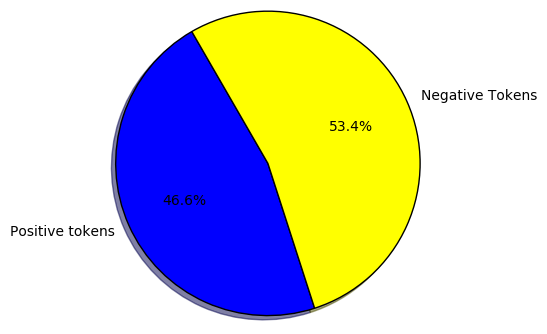

In [ ]:
labels = 'Positive tokens', 'Negative Tokens'
sizes = [40329,46151]
colors = ['blue', 'yellow' ]
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

In [ ]:
#no. of unique words in the data set.
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
24904


we can get an idea of the total number of unique words in the dataset from the above

Review length: 
Mean 1327.71 words (1005.219141)


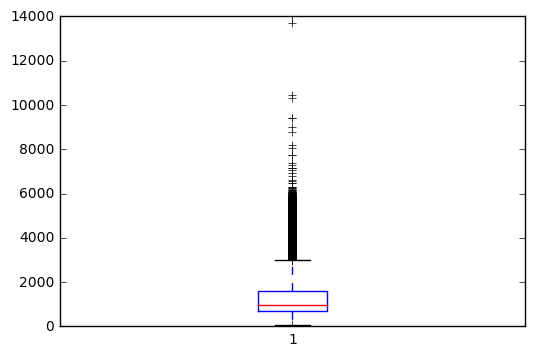

In [ ]:
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
pyplot.boxplot(result)
pyplot.show()
#We can see that the average review has just 61.11 words with a standard deviation of just 76.705041 words.

In [ ]:
#Check positivity/negativity of specific tokens
#Implemented searching of selected words in the pandas dataframe to analyse specific words in the feature sets

token_search = ['good']
print('\nSearch Results for token/s:',token_search)
print(tokens.loc[tokens['Token'].isin(token_search)])


Search Results for token/s: ['good']
      Token  Positive  Negative
32794  good    6242.0    5965.0


In [ ]:
#Analyse False Negatives (Actual: 1; Predicted: 0)(Predicted negative review for a positive review)
print(X_test[ y_pred < y_test ])

2161_10     How many of us wish that we could throw away s...
4950_8      Knowing when to end a movie is just as importa...
668_7       I just watched \The Last Wave\" in my school's...
8689_7      Perfect cast for a few-person drama. Simon is ...
3388_7      NYC, 2022: The Greenhouse effect, vanished oce...
10257_8     what can i say about this film that hasnt alre...
7027_7      \Bye Bye Birdie\" isn't one of the best musica...
9193_10     It holds very true to the original manga of th...
7512_8      Firstly, I have heard great things about this ...
9619_10     OK so a 10 for a 2 1/2 star movie you ask?...w...
5135_10     Simply but imaginatively filmed studio-set per...
748_9       This is 2009 and this way underrated gem has l...
11284_8     When I was a kid it was Lex Barker's time as T...
6459_10     Back to the roots with \like it is in heaven\"...
11556_7     Jack Lemmon and Walter Matthau began and endin...
2250_8      This is a wonderful movie about the struggle o...
1211_7  

In [ ]:
#Analyse False Positives (Actual: 0; Predicted: 1)(Predicted positive review for a negative review)
print(X_test[ y_pred > y_test ])

6214_4     What?!?? Why are people saying this is \mind b...
10864_1    The reason I intended to give this movie a cha...
8467_1     My friends and I rented this from Blockbuster ...
9427_1     When I rented \Unhinged\", I was expecting a g...
10209_3    Having been pleasantly surprised by Sandra Bul...
11651_3    Given that this movie was put together in less...
11223_1    I watched the movie, and was dismayed to say t...
1423_2     Wow. Watching this film today, you can't help ...
5487_4     This is one of those films the British Lottery...
3151_2     \ It had to be You\" is another sign that Holl...
7079_1     No reason to bother renting this flick. From t...
3109_4     This movie wasn't awful but it wasn't very goo...
10651_1    Want to know the secret to making a slasher fi...
1953_2     The first episode of this new show was on toda...
6541_4     60 minutes in the beautiful Christina Galbo tr...
10172_1    When I spotted that Noah Wyle and Ricky Schrod...
11926_1    i am rarely m

In [ ]:
#Custom Test: Test a review on the best performing model (Logistic Regression) with 99% accuracy.
#Used the most accurate model (Logistic Regression) to train on the entire dataset.
trainingVector = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 5)
trainingVector.fit(X)
X_dtm = trainingVector.transform(X)
LR_complete = LogisticRegression()
LR_complete.fit(X_dtm, y)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#Input Review.... any custom review as input
print('\nTest a custom review message')
print('Enter review to be analysed: ', end=" ")
test = []
test.append(input())
test_dtm = trainingVector.transform(test)
predLabel = LR_complete.predict(test_dtm)
tags = ['Negative','Positive']


Test a custom review message
Enter review to be analysed:  this is was not a long movie and was awesome


In [ ]:
#Display Output
print('The review is predicted',tags[predLabel[0]])


The review is predicted Positive


In [ ]:
print('Comparison between Classifiers')

Comparison between Classifiers


Automatically created module for IPython interactive environment


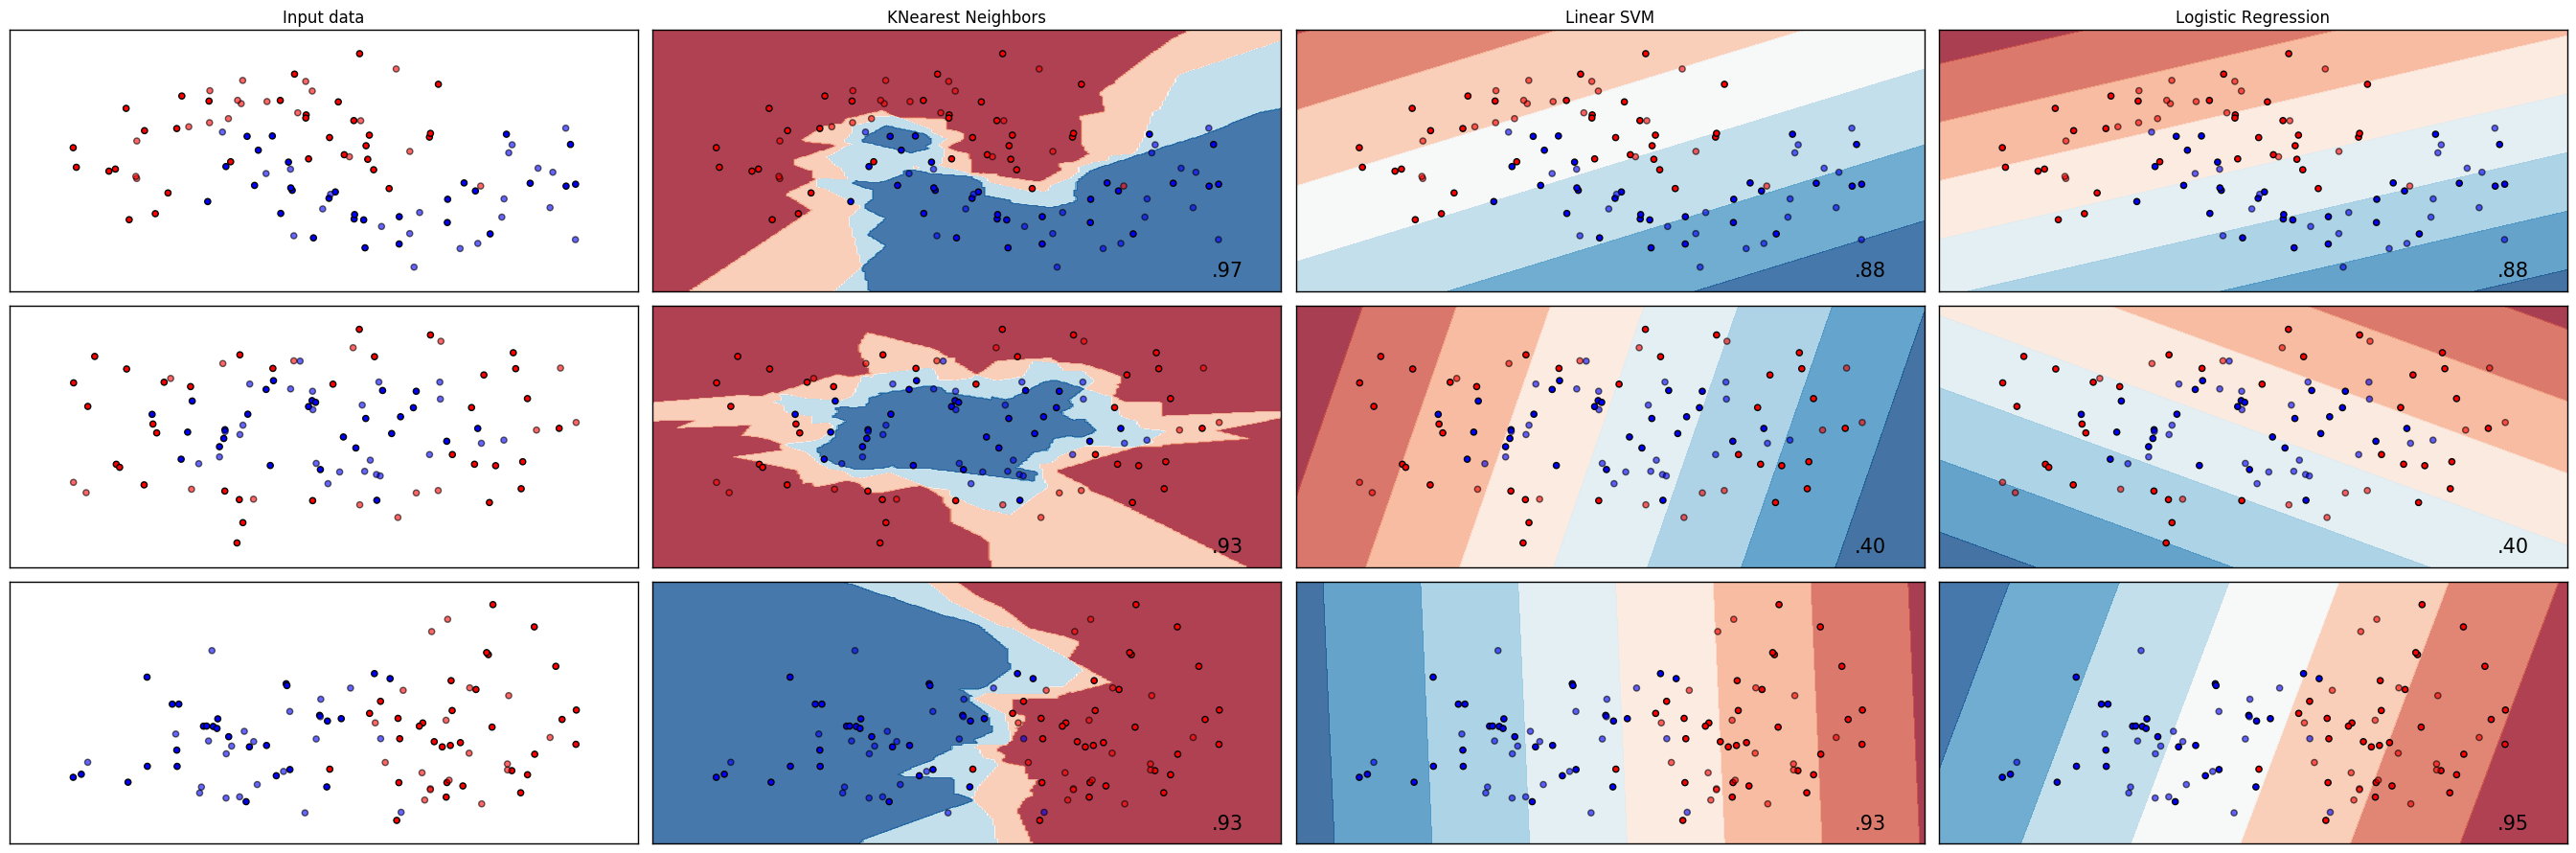

In [ ]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

h = .02  # step size in the mesh

names = ["KNearest Neighbors", "Linear SVM",
          "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    LogisticRegression()


    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()